In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
match_df = pd.read_csv(r"C:\Users\Giriraj S A\Downloads\matches (1).csv")


In [4]:
print(match_df.shape)

(1095, 20)


In [5]:
print(match_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
print(match_df.head())

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [7]:
print(match_df.describe())

                 id  result_margin  target_runs  target_overs
count  1.095000e+03    1076.000000  1092.000000   1092.000000
mean   9.048283e+05      17.259294   165.684066     19.759341
std    3.677402e+05      21.787444    33.427048      1.581108
min    3.359820e+05       1.000000    43.000000      5.000000
25%    5.483315e+05       6.000000   146.000000     20.000000
50%    9.809610e+05       8.000000   166.000000     20.000000
75%    1.254062e+06      20.000000   187.000000     20.000000
max    1.426312e+06     146.000000   288.000000     20.000000


In [8]:
print(match_df.isnull().sum())

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [9]:
match_df["city"] = match_df["city"].fillna("delhi")
print(match_df.isnull().sum())

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [10]:
print(match_df.duplicated().sum())

0


In [11]:
match_df.drop(columns=['method'], inplace=True)

In [12]:
match_df['city'].fillna('Unknown', inplace=True)

In [13]:
match_df.dropna(subset=['winner', 'player_of_match'], inplace=True)

In [14]:
match_df['result_margin'].fillna(match_df['result_margin'].median(), inplace=True)

In [15]:
print(match_df['result_margin'])

0       140.0
1        33.0
2         9.0
3         5.0
4         5.0
        ...  
1090      4.0
1091      8.0
1092      4.0
1093     36.0
1094      8.0
Name: result_margin, Length: 1090, dtype: float64


In [16]:
match_df['target_overs'].fillna(match_df['target_overs'].median(), inplace=True)



In [17]:
print(match_df['target_overs'])

0       20.0
1       20.0
2       20.0
3       20.0
4       20.0
        ... 
1090    20.0
1091    20.0
1092    20.0
1093    20.0
1094    20.0
Name: target_overs, Length: 1090, dtype: float64


In [18]:
categorical_features = match_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = match_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [19]:

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'super_over', 'umpire1', 'umpire2']
Numerical Features: ['id', 'result_margin', 'target_runs', 'target_overs']


In [20]:
# # Perform One-Hot Encoding on categorical features
# df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# # Display the transformed dataset
# print(df_encoded.head())


In [21]:
deliver_dataset=pd.read_csv(r"C:\Users\Giriraj S A\Downloads\deliveries (1).csv")

In [22]:
# 1. Total Runs Scored Per Over
total_runs_per_over = deliver_dataset.groupby("over")["total_runs"].sum()

In [23]:
# 2. Dismissal Types Distribution
dismissal_types = deliver_dataset["dismissal_kind"].value_counts()

In [24]:
# 3. Total Extra Runs Conceded by Teams
total_extra_runs = deliver_dataset.groupby("bowling_team")["extra_runs"].sum()

In [25]:
# 4. Average Runs Per Over
avg_runs_per_over = deliver_dataset.groupby("over")["total_runs"].mean()

In [26]:
# 5. Distribution of Runs Per Ball
runs_per_ball_distribution = deliver_dataset["batsman_runs"].value_counts()

In [27]:
batsmen_stats = deliver_dataset.groupby("batter").agg(total_runs=("batsman_runs", "sum"),
                                                     total_balls=("ball", "count"))
batsmen_stats["strike_rate"] = (batsmen_stats["total_runs"] / batsmen_stats["total_balls"]) * 100
top_10_batsmen = batsmen_stats[batsmen_stats["total_balls"] >= 50].sort_values(by="strike_rate", ascending=False).head(10)

In [28]:
#day 1 task

In [29]:
# 7. Most Sixes Hit by Players
most_sixes = deliver_dataset[deliver_dataset["batsman_runs"] == 6]["batter"].value_counts().head(10)

In [30]:
# 8. Dot Ball Percentage by Bowler
dot_balls = deliver_dataset[deliver_dataset["total_runs"] == 0].groupby("bowler")["ball"].count()
total_balls = deliver_dataset.groupby("bowler")["ball"].count()
dot_ball_percentage = (dot_balls / total_balls) * 100
dot_ball_percentage = dot_ball_percentage.dropna().sort_values(ascending=False).head(10)

In [31]:
# 9. Top 10 Bowlers Conceding Most Boundaries
boundaries = deliver_dataset[deliver_dataset["batsman_runs"].isin([4, 6])].groupby("bowler")["batsman_runs"].count()
top_10_boundary_conceding_bowlers = boundaries.sort_values(ascending=False).head(10)


In [32]:
 #10. Wicket Distribution Across Overs
wickets_per_over = deliver_dataset[deliver_dataset["is_wicket"] == 1].groupby("over")["is_wicket"].count()

In [33]:
# 11. Total Runs Scored in Powerplay (Overs 1-6)
powerplay_runs = deliver_dataset[deliver_dataset["over"].between(1, 6)]["total_runs"].sum()

In [34]:
# 12. Total Runs Scored in Death Overs (Overs 17-20)
death_over_runs = deliver_dataset[deliver_dataset["over"].between(17, 20)]["total_runs"].sum()

In [35]:

# 13. Top 10 Most Economical Bowlers
economy_rate = deliver_dataset.groupby("bowler").agg(total_runs=("total_runs", "sum"), total_balls=("ball", "count"))
economy_rate["economy"] = (economy_rate["total_runs"] / economy_rate["total_balls"]) * 6
top_10_economical_bowlers = economy_rate.sort_values(by="economy").head(10)


In [36]:
# Print results
print("Total Runs Scored Per Over:\n", total_runs_per_over)
print("\nDismissal Types Distribution:\n", dismissal_types)
print("\nTotal Extra Runs Conceded by Teams:\n", total_extra_runs)
print("\nAverage Runs Per Over:\n", avg_runs_per_over)
print("\nDistribution of Runs Per Ball:\n", runs_per_ball_distribution)
print("\nTop 10 Batsmen by Strike Rate:\n", top_10_batsmen)
print("\nMost Sixes Hit by Players:\n", most_sixes)
print("\nDot Ball Percentage by Bowler:\n", dot_ball_percentage)
print("\nTop 10 Bowlers Conceding Most Boundaries:\n", top_10_boundary_conceding_bowlers)
print("\nWicket Distribution Across Overs:\n", wickets_per_over)
print("\nTotal Runs Scored in Powerplay:", powerplay_runs)
print("\nTotal Runs Scored in Death Overs:", death_over_runs)
print("\nTop 10 Most Economical Bowlers:\n", top_10_economical_bowlers)

Total Runs Scored Per Over:
 over
0     13651
1     16163
2     17895
3     18415
4     18565
5     18528
6     14839
7     15981
8     16639
9     16353
10    16779
11    17076
12    17205
13    17634
14    18149
15    18472
16    19012
17    19559
18    19076
19    17765
Name: total_runs, dtype: int64

Dismissal Types Distribution:
 dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

Total Extra Runs Conceded by Teams:
 bowling_team
Chennai Super Kings            1842
Deccan Chargers                 659
Delhi Capitals                  725
Delhi Daredevils               1268
Gujarat Lions                   188
Gujarat Titans                  295
Kings XI Punjab                1571
Kochi Tuskers Keral

In [37]:
print("\nDismissal Types Distribution:\n", dismissal_types)



Dismissal Types Distribution:
 dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64


In [38]:
print("\nTotal Extra Runs Conceded by Teams:\n", total_extra_runs)



Total Extra Runs Conceded by Teams:
 bowling_team
Chennai Super Kings            1842
Deccan Chargers                 659
Delhi Capitals                  725
Delhi Daredevils               1268
Gujarat Lions                   188
Gujarat Titans                  295
Kings XI Punjab                1571
Kochi Tuskers Kerala            110
Kolkata Knight Riders          1957
Lucknow Super Giants            386
Mumbai Indians                 2295
Pune Warriors                   335
Punjab Kings                    480
Rajasthan Royals               1917
Rising Pune Supergiant          111
Rising Pune Supergiants         108
Royal Challengers Bangalore    2040
Royal Challengers Bengaluru     151
Sunrisers Hyderabad            1254
Name: extra_runs, dtype: int64


In [39]:
print("\nAverage Runs Per Over:\n", avg_runs_per_over)



Average Runs Per Over:
 over
0     0.981663
1     1.173528
2     1.316099
3     1.356538
4     1.369100
5     1.373055
6     1.103107
7     1.189948
8     1.242087
9     1.224577
10    1.262623
11    1.287686
12    1.301240
13    1.343645
14    1.393504
15    1.434273
16    1.498778
17    1.587839
18    1.646896
19    1.776855
Name: total_runs, dtype: float64


In [40]:
print("\nDistribution of Runs Per Ball:\n", runs_per_ball_distribution)



Distribution of Runs Per Ball:
 batsman_runs
0    103940
1     96778
4     29850
2     16453
6     13051
3       783
5        65
Name: count, dtype: int64


In [41]:
print("\nTop 10 Batsmen by Strike Rate:\n", top_10_batsmen)



Top 10 Batsmen by Strike Rate:
                  total_runs  total_balls  strike_rate
batter                                               
J Fraser-McGurk         330          150   220.000000
WG Jacks                230          133   172.932331
PD Salt                 653          385   169.610390
T Stubbs                405          239   169.456067
R Shepherd              115           68   169.117647
TM Head                 772          458   168.558952
LJ Wright               106           63   168.253968
Naman Dhir              140           84   166.666667
KK Cooper               116           70   165.714286
AD Russell             2488         1515   164.224422


In [42]:
print("\nMost Sixes Hit by Players:\n", most_sixes)



Most Sixes Hit by Players:
 batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
Name: count, dtype: int64


In [43]:
print("\nDot Ball Percentage by Bowler:\n", dot_ball_percentage)



Dot Ball Percentage by Bowler:
 bowler
AC Gilchrist     100.000000
SS Iyer           66.666667
SS Mundhe         57.142857
LA Carseldine     57.142857
DJ Muthuswami     52.380952
NB Singh          52.000000
MP Yadav          51.315789
JW Hastings       50.819672
P Prasanth        50.000000
Sachin Baby       50.000000
Name: ball, dtype: float64


In [44]:
print("\nTop 10 Bowlers Conceding Most Boundaries:\n", top_10_boundary_conceding_bowlers)



Top 10 Bowlers Conceding Most Boundaries:
 bowler
B Kumar           656
UT Yadav          624
PP Chawla         596
R Ashwin          519
DJ Bravo          504
YS Chahal         499
RA Jadeja         497
Sandeep Sharma    494
Mohammed Shami    486
TA Boult          484
Name: batsman_runs, dtype: int64


In [45]:
print("\nWicket Distribution Across Overs:\n", wickets_per_over)



Wicket Distribution Across Overs:
 over
0      463
1      503
2      533
3      548
4      576
5      540
6      444
7      472
8      537
9      498
10     568
11     567
12     585
13     633
14     695
15     736
16     779
17     976
18     989
19    1308
Name: is_wicket, dtype: int64


In [46]:
print("\nTotal Runs Scored in Powerplay:", powerplay_runs)



Total Runs Scored in Powerplay: 104405


In [47]:
print("\nTotal Runs Scored in Death Overs:", death_over_runs)



Total Runs Scored in Death Overs: 56400


In [48]:
print("\nTop 10 Most Economical Bowlers:\n", top_10_economical_bowlers)


Top 10 Most Economical Bowlers:
                total_runs  total_balls   economy
bowler                                          
AC Gilchrist            0            1  0.000000
R Ravindra              7           12  3.500000
NB Singh               18           25  4.320000
Sachin Baby             8           10  4.800000
AM Rahane               5            6  5.000000
LA Carseldine           6            7  5.142857
SS Mundhe               6            7  5.142857
DJ Thornely            40           44  5.454545
M Manhas               42           42  6.000000
MW Short               25           25  6.000000


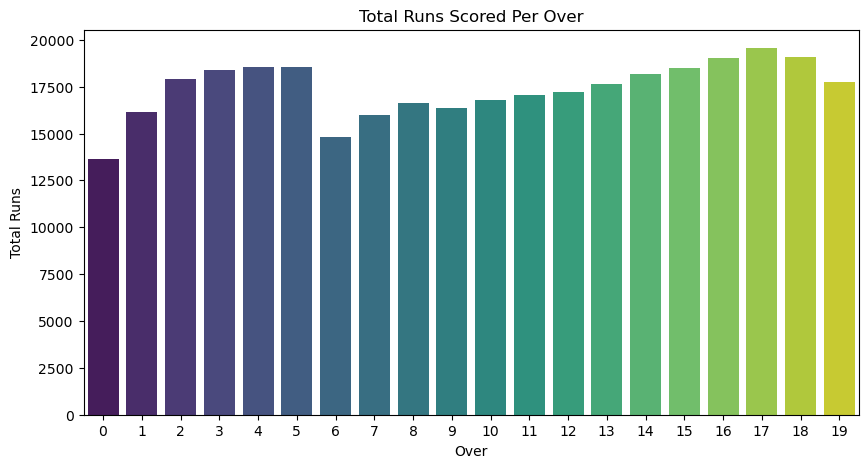

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by over and sum the total runs
total_runs_per_over = deliver_dataset.groupby("over")["total_runs"].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=total_runs_per_over.index, y=total_runs_per_over.values, palette="viridis")
plt.xlabel("Over")
plt.ylabel("Total Runs")
plt.title("Total Runs Scored Per Over")
plt.show()


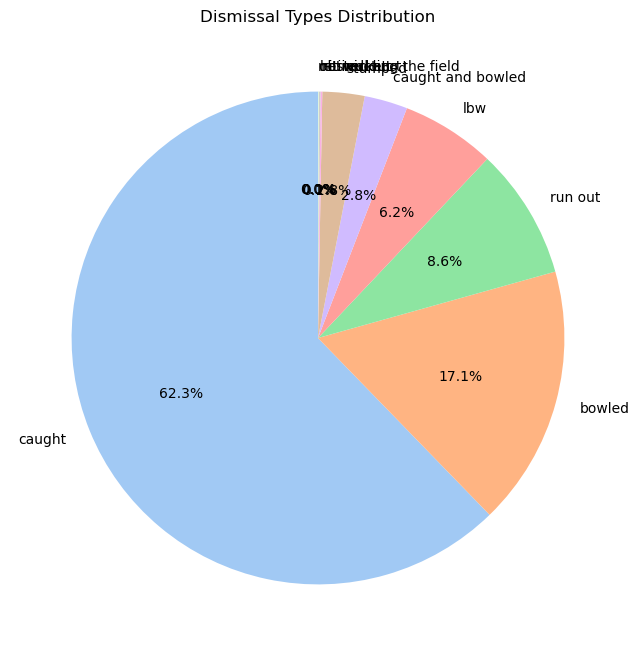

In [50]:
# Count of different dismissal kinds
dismissals = deliver_dataset["dismissal_kind"].value_counts()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(dismissals, labels=dismissals.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Dismissal Types Distribution")
plt.show()


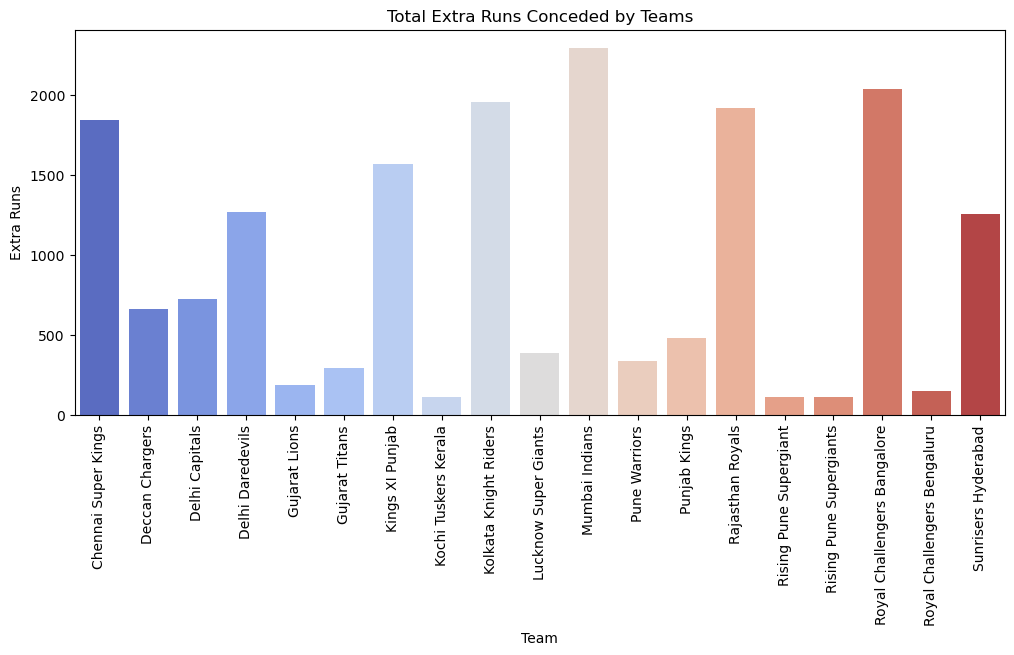

In [51]:
extra_runs = deliver_dataset.groupby("bowling_team")["extra_runs"].sum()

# Bar Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=extra_runs.index, y=extra_runs.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Extra Runs")
plt.title("Total Extra Runs Conceded by Teams")
plt.show()


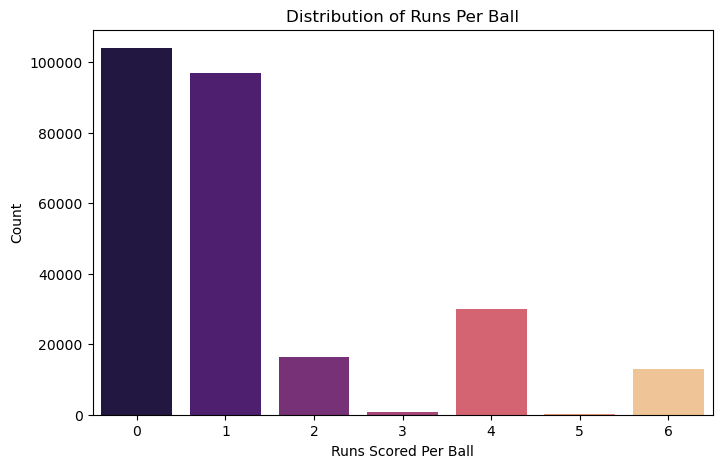

In [52]:
runs_distribution = deliver_dataset["batsman_runs"].value_counts()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=runs_distribution.index, y=runs_distribution.values, palette="magma")
plt.xlabel("Runs Scored Per Ball")
plt.ylabel("Count")
plt.title("Distribution of Runs Per Ball")
plt.show()


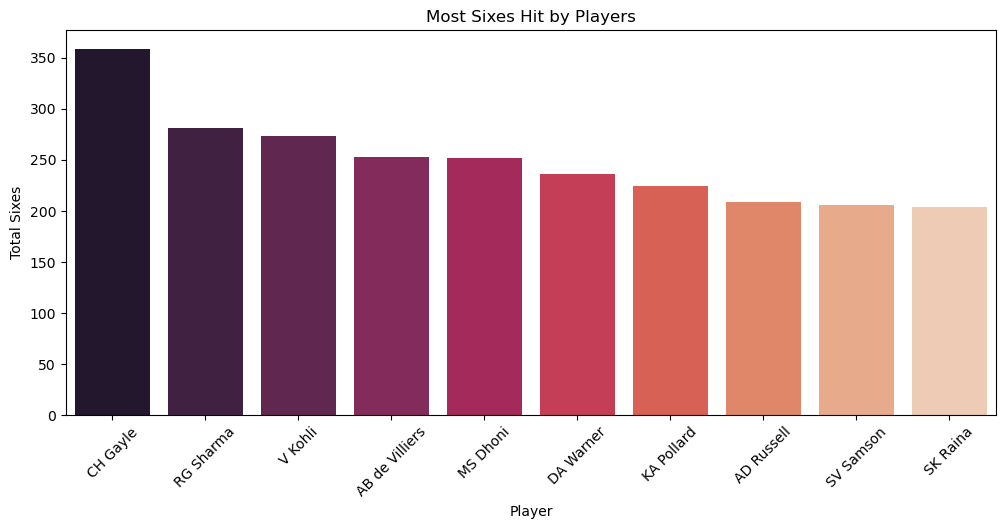

In [53]:
most_sixes = deliver_dataset[deliver_dataset["batsman_runs"] == 6].groupby("batter")["batsman_runs"].count().sort_values(ascending=False).head(10)

# Bar Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=most_sixes.index, y=most_sixes.values, palette="rocket")
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Total Sixes")
plt.title("Most Sixes Hit by Players")
plt.show()


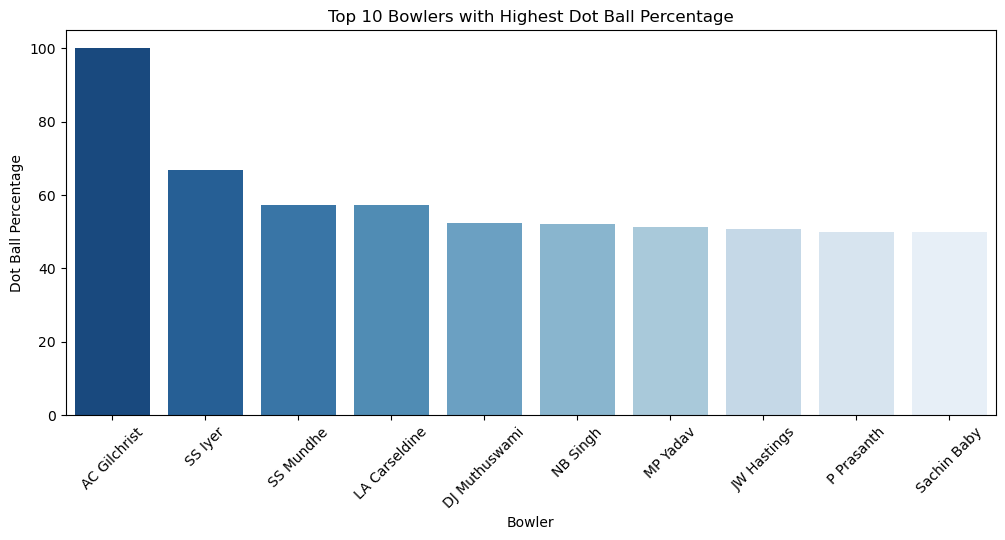

In [54]:
dot_balls = deliver_dataset[deliver_dataset["total_runs"] == 0].groupby("bowler")["total_runs"].count()
total_balls = deliver_dataset.groupby("bowler")["total_runs"].count()
dot_ball_percentage = (dot_balls / total_balls * 100).dropna().sort_values(ascending=False).head(10)

# Bar Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=dot_ball_percentage.index, y=dot_ball_percentage.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Bowler")
plt.ylabel("Dot Ball Percentage")
plt.title("Top 10 Bowlers with Highest Dot Ball Percentage")
plt.show()


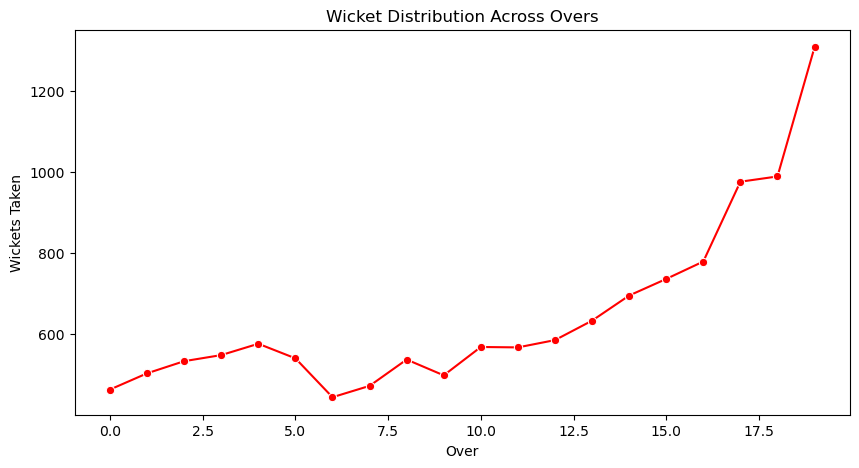

In [55]:
wickets_per_over = deliver_dataset[deliver_dataset["is_wicket"] == 1].groupby("over")["is_wicket"].count()

# Line Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=wickets_per_over.index, y=wickets_per_over.values, marker="o", linestyle="-", color="red")
plt.xlabel("Over")
plt.ylabel("Wickets Taken")
plt.title("Wicket Distribution Across Overs")
plt.show()


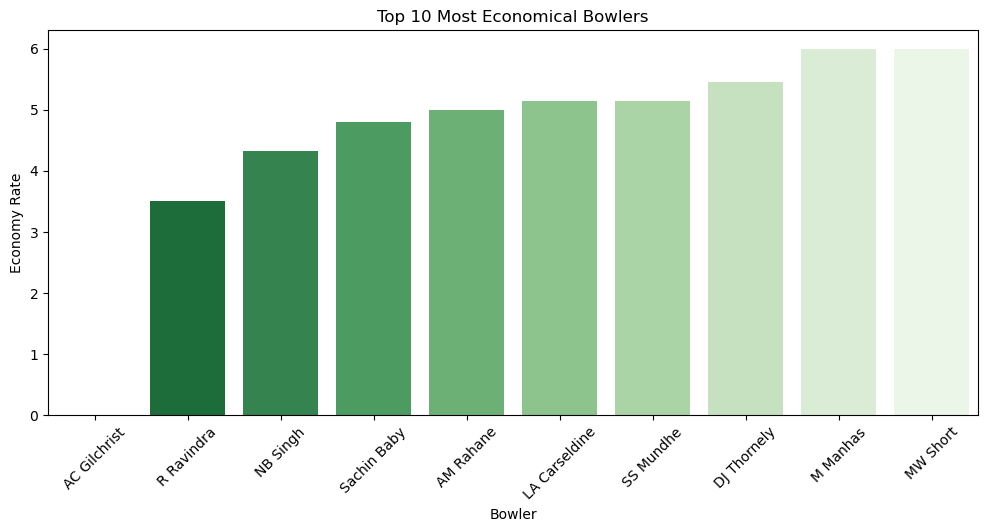

In [56]:
bowler_runs = deliver_dataset.groupby("bowler")["total_runs"].sum()
bowler_balls = deliver_dataset.groupby("bowler")["ball"].count()
economy_rate = (bowler_runs / (bowler_balls / 6)).sort_values().head(10)

# Bar Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=economy_rate.index, y=economy_rate.values, palette="Greens_r")
plt.xticks(rotation=45)
plt.xlabel("Bowler")
plt.ylabel("Economy Rate")
plt.title("Top 10 Most Economical Bowlers")
plt.show()


In [57]:
deliver_dataset.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [58]:
# Define the match ID you want to analyze
match_id = 335983 

# Filter data for the specific match
specific_match_df = deliver_dataset[deliver_dataset["match_id"] == match_id]

# Calculate total runs per over
runs_per_over_specific_match = specific_match_df.groupby("over")["total_runs"].sum()

# Display the result
print(runs_per_over_specific_match)
dismissal_distribution = specific_match_df["dismissal_kind"].value_counts()

# Display the result
print(dismissal_distribution)


over
0     14
1     22
2     18
3     16
4     19
5     27
6     15
7     23
8     26
9     18
10    24
11    32
12    20
13    21
14    31
15    19
16    24
17    22
18    22
19    34
Name: total_runs, dtype: int64
dismissal_kind
caught    6
bowled    2
lbw       1
Name: count, dtype: int64


In [59]:
# Group by bowling team and sum extra runs
extra_runs_by_team_specific_match = specific_match_df.groupby("bowling_team")["extra_runs"].sum()

# Display the result
print(extra_runs_by_team_specific_match)



bowling_team
Chennai Super Kings    11
Kings XI Punjab         6
Name: extra_runs, dtype: int64


In [60]:
# Group by over and calculate the average total runs per over
total_runs_per_over = specific_match_df.groupby("over")["total_runs"].sum()

# Calculate average runs per over (for that specific match)
avg_runs_per_over_specific_match = total_runs_per_over.mean()

# Display the results
print("Total Runs Per Over:\n", total_runs_per_over)
print("\nAverage Runs Per Over for Match ID", match_id, ":", avg_runs_per_over_specific_match)

Total Runs Per Over:
 over
0     14
1     22
2     18
3     16
4     19
5     27
6     15
7     23
8     26
9     18
10    24
11    32
12    20
13    21
14    31
15    19
16    24
17    22
18    22
19    34
Name: total_runs, dtype: int64

Average Runs Per Over for Match ID 335983 : 22.35


In [61]:
# Count occurrences of 1s, 2s, 4s, and 6s
runs_distribution_specific_match = specific_match_df["batsman_runs"].value_counts().reindex([1, 2, 4, 6], fill_value=0)

# Display the result
print(runs_distribution_specific_match)

batsman_runs
1    98
2    15
4    38
6    25
Name: count, dtype: int64


In [62]:




# Check column names to avoid errors
print("Matches Dataset Columns:", match_df.columns)
print("Deliveries Dataset Columns:",deliver_dataset.columns)

# If match_id is missing in matches_df, rename it
if "match_id" not in match_df.columns:
    match_df.rename(columns={"id": "match_id"}, inplace=True)

# Define the specific season to analyze
specific_season = 2021

# Merge deliveries with matches dataset to get the season column
merged_df = deliver_dataset.merge(match_df[["match_id", "season"]], on="match_id", how="inner")

# Filter data for the specific season
season_df = merged_df[merged_df["season"] == specific_season]

# Calculate total runs and balls faced by each batsman
batsman_stats = season_df.groupby("batter").agg(
    total_runs=("batsman_runs", "sum"),
    total_balls=("ball", "count")
)

# Calculate Strike Rate: (Runs / Balls) * 100
batsman_stats["strike_rate"] = (batsman_stats["total_runs"] / batsman_stats["total_balls"]) * 100

# Get the Top 10 Batsmen by Strike Rate (minimum 50 balls faced)
top_10_batsmen = batsman_stats[batsman_stats["total_balls"] >= 50].sort_values(by="strike_rate", ascending=False).head(10)

# Display the result
print("\nTop 10 Batsmen by Strike Rate in 2021 Season:\n")
print(top_10_batsmen)



Matches Dataset Columns: Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'umpire1', 'umpire2'],
      dtype='object')
Deliveries Dataset Columns: Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

Top 10 Batsmen by Strike Rate in 2021 Season:

Empty DataFrame
Columns: [total_runs, total_balls, strike_rate]
Index: []
